<a href="https://colab.research.google.com/github/Dheeraj8901/Data_Science/blob/main/Basic_stats_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Descriptive Analytics for Numerical Columns***

In [14]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv("/content/sales_data_with_discounts.csv")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [17]:
# Identify numerical columns
identify_numeric_columns = data.corr(numeric_only=True)
identify_numeric_columns

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Volume,1.000000,-0.250878,-0.034789,0.157972,0.066297,-0.044373
Avg Price,-0.250878,1.000000,0.831978,-0.831582,0.676007,0.841166
Total Sales Value,-0.034789,0.831978,1.000000,-0.835431,0.932410,0.999382
Discount Rate (%),0.157972,-0.831582,-0.835431,1.000000,-0.657607,-0.846720
Discount Amount,0.066297,0.676007,0.932410,-0.657607,1.000000,0.919127
Net Sales Value,-0.044373,0.841166,0.999382,-0.846720,0.919127,1.000000


In [18]:
# Get numeric column names
numeric_cols = data.select_dtypes(include=['number']).columns
numeric_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [19]:
#Calculating mean, median, mode, and standard deviation
mean_values = data[numeric_cols].mean()
median_values = data[numeric_cols].median()
mode_values = data[numeric_cols].mode().iloc[0] # .iloc[0] is used to select the first row in case there are multiple modes
std_dev_values = data[numeric_cols].std()
##mean
print(mean_values)

print("----------------------")
#Mode
print(mode_values)
print("----------------------")
# std dev
print(std_dev_values)

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64
----------------------
Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64
----------------------
Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


# **Data Visualization**

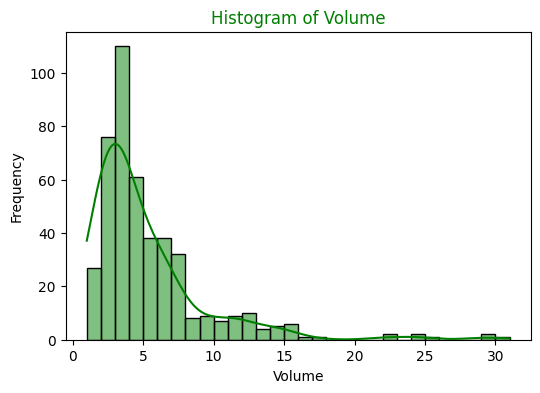

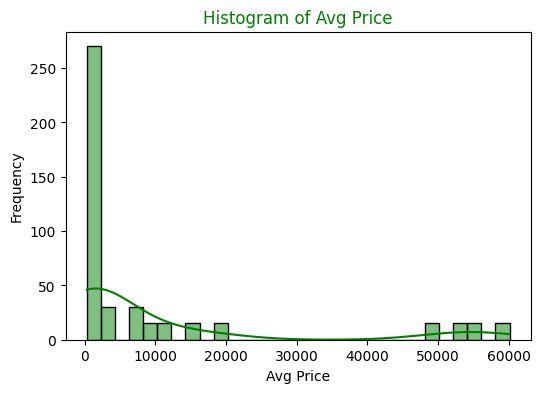

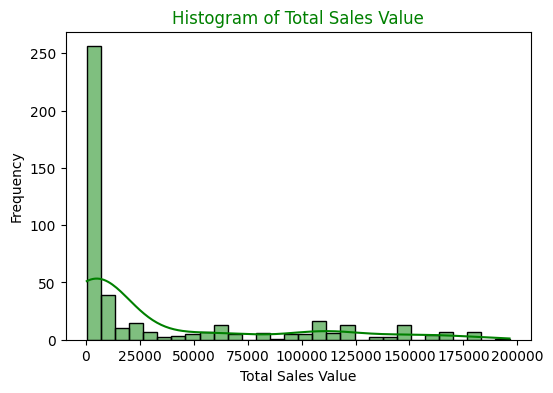

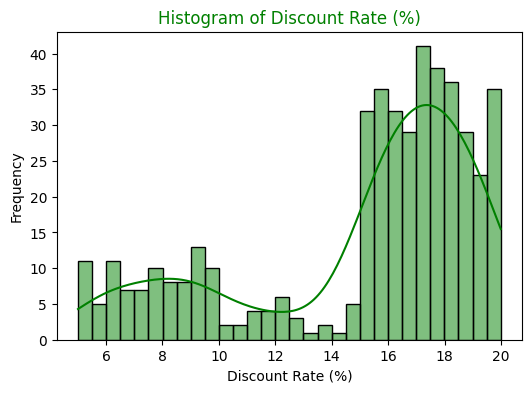

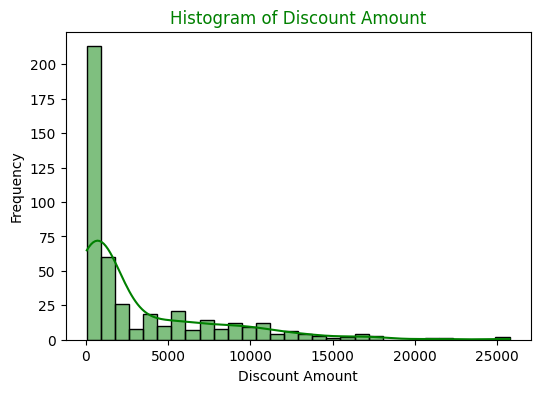

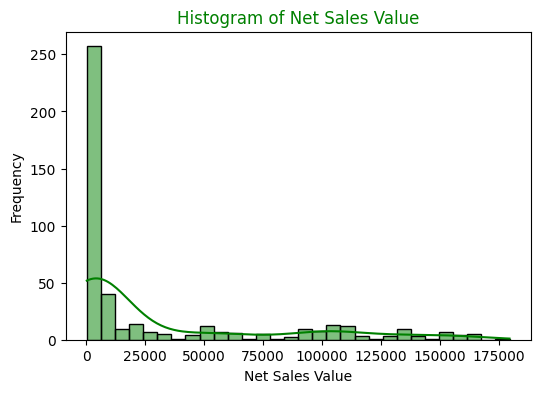

In [34]:
#plotting Histogram for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30,color="Green")
    plt.title(f'Histogram of {col}',color="Green")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

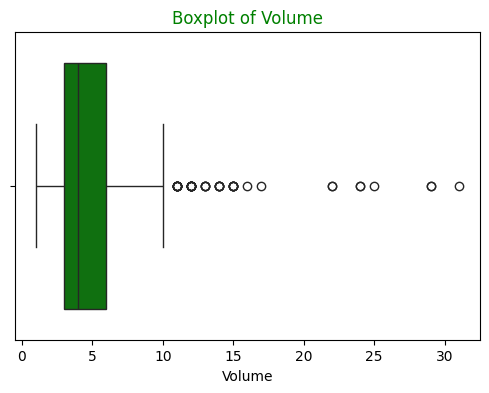

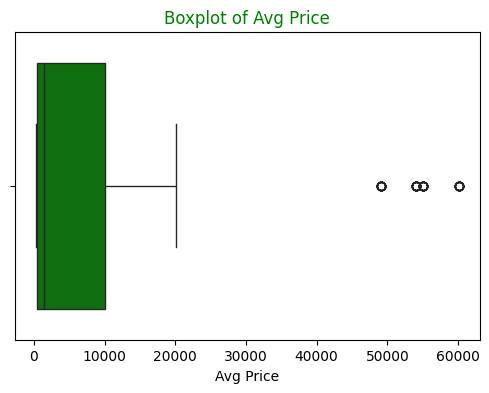

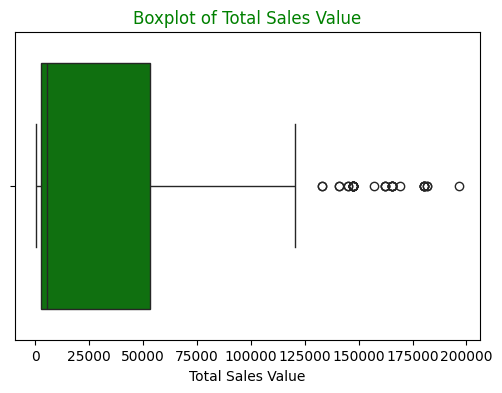

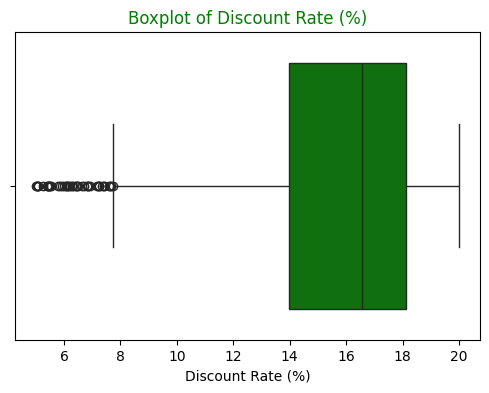

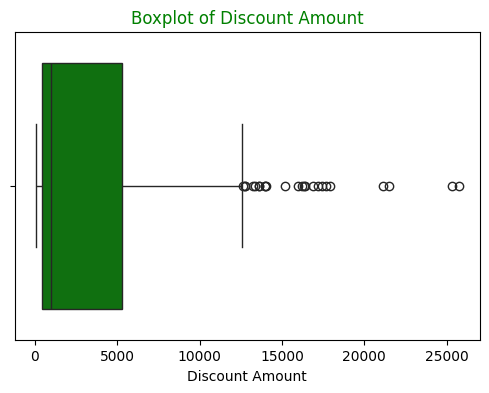

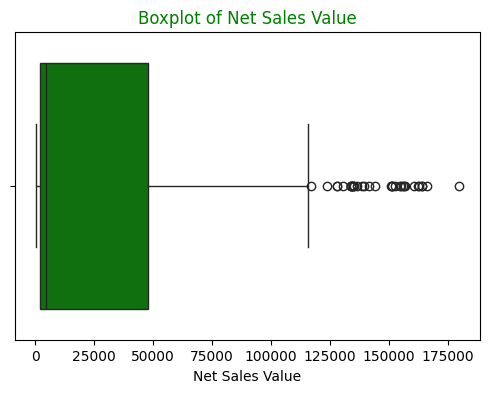

In [37]:
# Plotting Boxplot for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col],color="Green")
    plt.title(f'Boxplot of {col}',color="Green")
    plt.xlabel(col)
    plt.show()

In [38]:
# Identify the categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


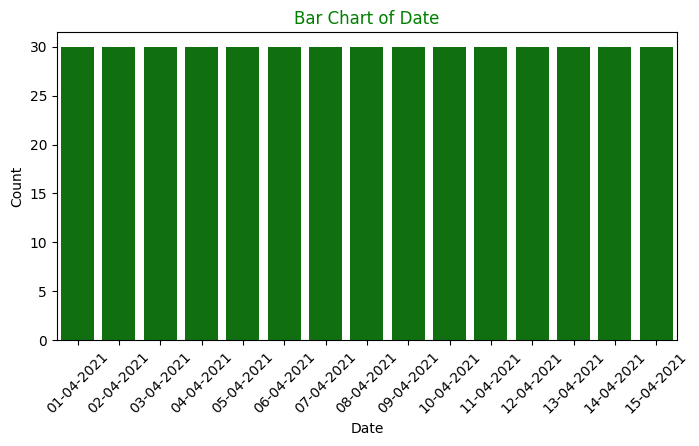

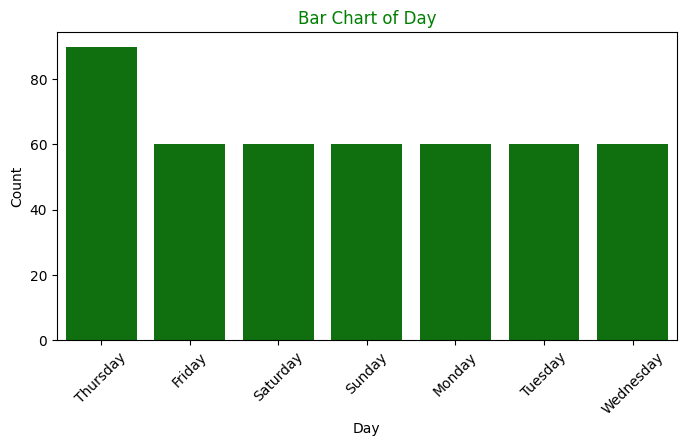

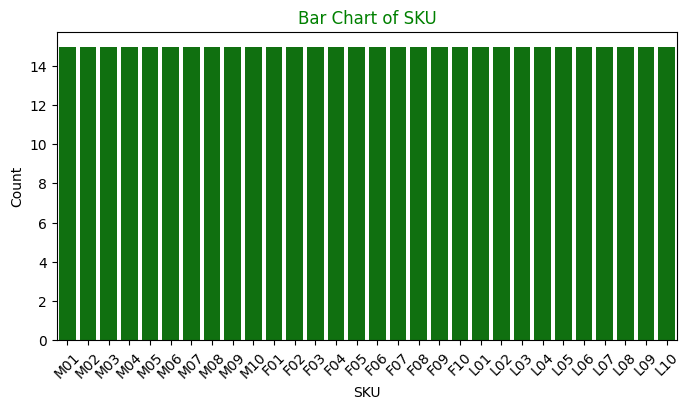

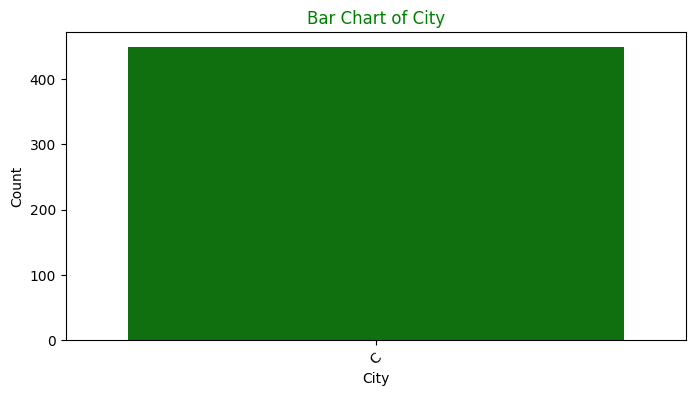

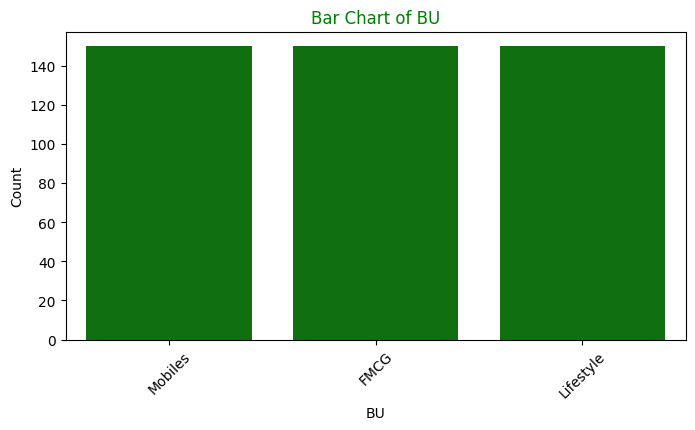

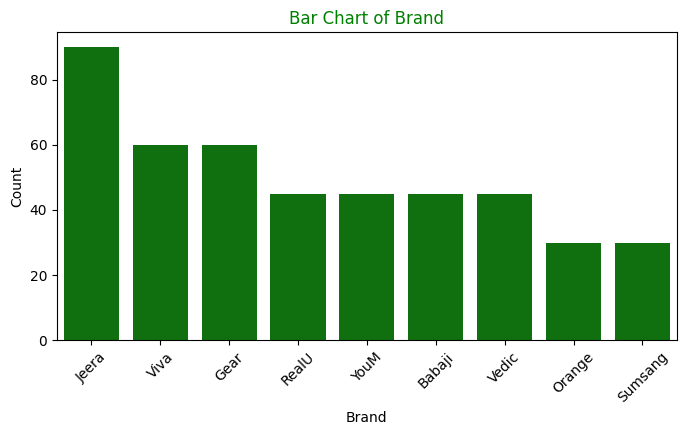

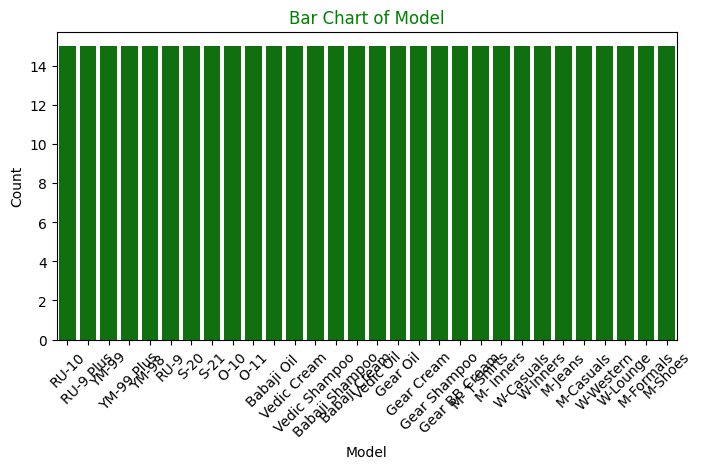

In [41]:
# Plotting Barplot for each numeric column
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index,color="Green")
    plt.title(f'Bar Chart of {col}',color="Green")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

# **Standardization of Numerical Variables**

In [42]:
# Data preprocessing and standardization
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler

In [43]:
# Standardizing numerical columns
scaler = StandardScaler()
scaler

StandardScaler()

In [46]:
#creating a copy of original dataset
data_standardized = data.copy()
data_standardized[numeric_cols] = scaler.fit_transform(data[numeric_cols])
data_standardized[numeric_cols].head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595


In [48]:
# Displaying summary sttistics after standardization
data_standardized[numeric_cols].describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,6.118562e-17,3.157968e-17,1.578984e-17,-3.552714e-17,-5.526444e-17,1.973730e-17
std,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00
min,-9.620925e-01,-5.627654e-01,-6.619170e-01,-2.406935e+00,-7.275032e-01,-6.508581e-01
25%,-4.889322e-01,-5.530754e-01,-6.163534e-01,-2.823066e-01,-6.406462e-01,-6.103625e-01
50%,-2.523521e-01,-4.985344e-01,-5.569226e-01,3.374180e-01,-5.233349e-01,-5.569025e-01
75%,2.208081e-01,-1.957016e-02,3.840648e-01,7.019781e-01,4.373018e-01,3.753543e-01
max,6.135311e+00,2.749009e+00,3.220894e+00,1.147360e+00,4.970494e+00,3.218536e+00


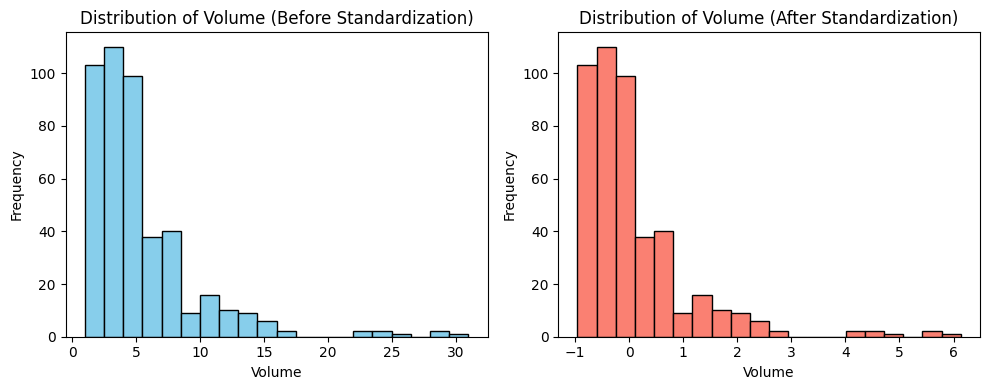

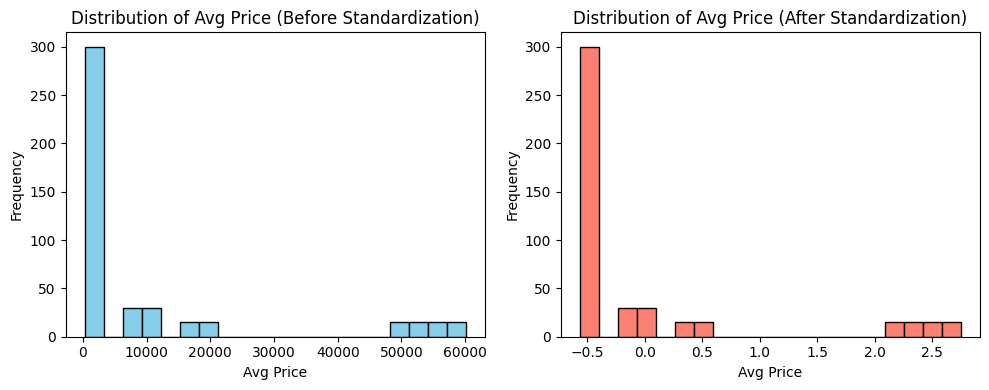

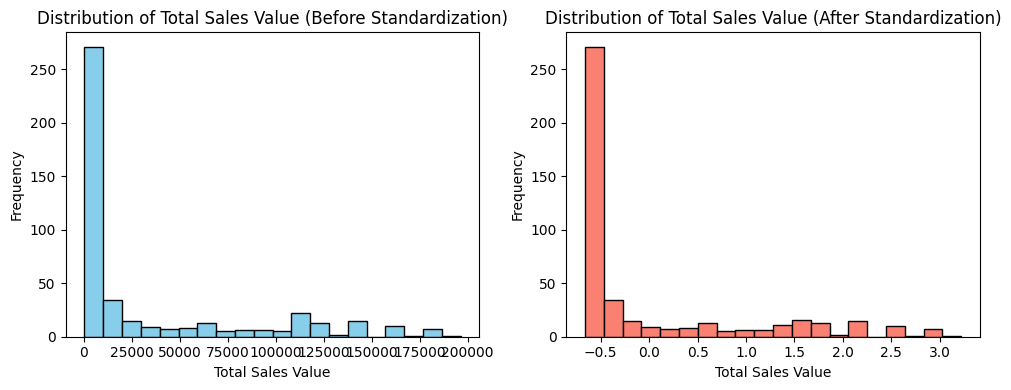

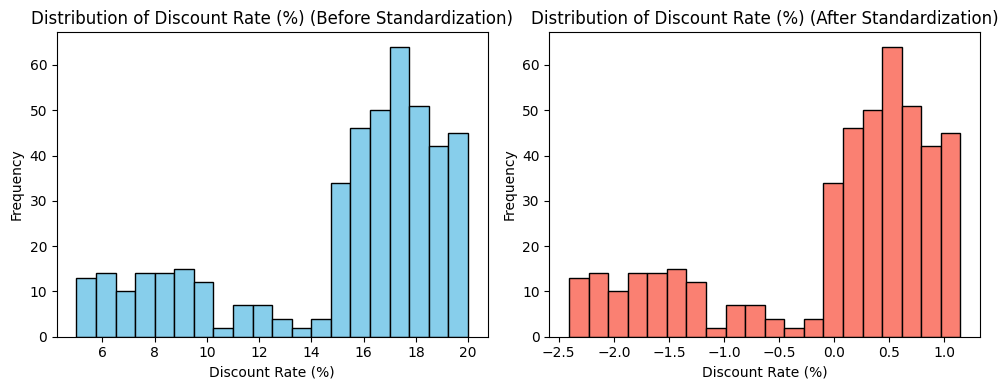

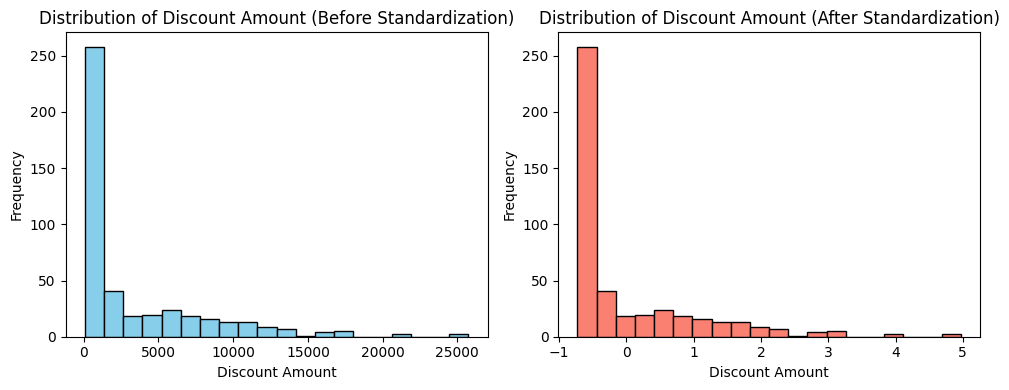

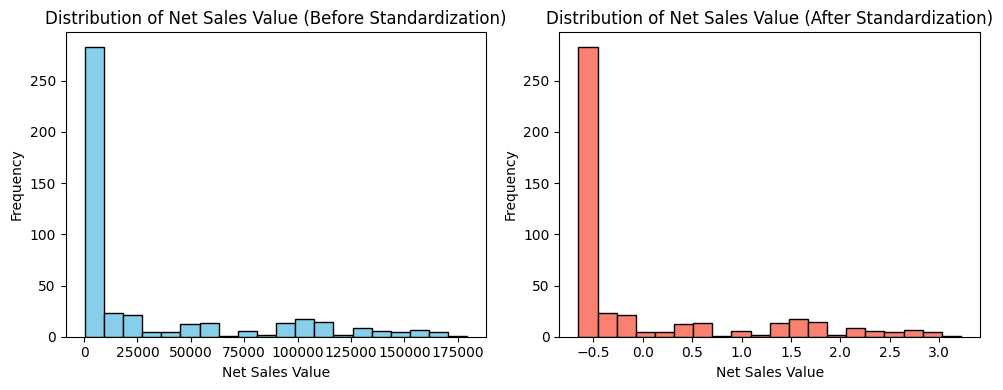

In [49]:
# Displaying comparison of data distributions before and after standardization
for column in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column} (Before Standardization)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    plt.hist(data_standardized[column], bins=20, color='salmon', edgecolor='black')
    plt.title(f'Distribution of {column} (After Standardization)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [50]:
# Conversion of Categorical Data into Dummy Variables
#Need for Converting Categorical Data into Dummy Variables (One-Hot Encoding)
#In many machine learning algorithms, categorical variables cannot be directly used as inputs.
#One-hot encoding is a technique used to convert categorical variables into a format that
#can be provided to machine learning algorithms. It creates binary (0 or 1) columns for each
#category in the categorical variable. This ensures that the categorical data is represented
#in a numerical format, allowing machine learning models to interpret and process it effectively.

In [52]:
# One-hot encode the categorical columns
data_encoded = pd.get_dummies(data,columns=categorical_cols)

In [53]:
# Display first few rows of encoded dataset
data_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [54]:
#  Conclusion

#   Key Insights
# - Numerical features exhibited both strong and weak correlations, helping identify relationships in the dataset.
# - Descriptive statistics (mean, median, mode, standard deviation) provided a clear understanding of central tendency and variability.
# - Histograms and boxplots effectively visualized distributions and highlighted potential outliers.
# - Bar charts revealed the frequency and distribution of categorical variables.
# - Overall, the visualizations helped detect skewness, outliers, and imbalanced category distributions.

#    Importance of Preprocessing
# - **Standardization (Z-score normalization):** Scales numerical features to a common range, minimizing bias and improving model performance.
# - **One-hot Encoding:** Transforms categorical variables into a machine-readable binary format, ensuring unbiased input for models.
# - These preprocessing steps enhance model accuracy, training stability, and the reliability of analytical results.